Research Question:Does the literacy rate play a role in the part-time employment rate? 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [39]:
literacy=pd.read_csv('UNdata_Export_20190226_203636225.csv', usecols=['Country or Area','Subgroup','Year','Value'])
literacy.columns = ['country','gender','year','value']
literacy[0:5]


,country,gender,year,value
0,Afghanistan,Female 15-24 yr,2000.0,18.4
1,Afghanistan,Male 15-24 yr,2000.0,50.8
2,Albania,Female 15-24 yr,2001.0,99.5
3,Albania,Male 15-24 yr,2001.0,99.4
4,Algeria,Female 15-24 yr,2002.0,86.1


In [40]:
employment=pd.read_csv('UNdata_Export_parttime_employment.csv',usecols=['Country or Area','Subgroup','Year','Value'])
employment.columns = ['country','gender','year','value']
employment[0:5]

,country,gender,year,value
0,Argentina,Female 15+ yr,2003.0,42.7
1,Argentina,Female 15+ yr,2002.0,43.1
2,Argentina,Female 15+ yr,2001.0,34.6
3,Argentina,Female 15+ yr,2000.0,32.7
4,Argentina,Female 15+ yr,1999.0,32.5


In [81]:
import pandas as pd
df = pd.merge(literacy, employment, how='outer', sort=True, on=['country','year'])
df[30:35]

,country,gender_x,year,value_x,gender_y,value_y
30,Bahrain,Female 15-24 yr,1991.0,96.6,NaN,NaN
31,Bahrain,Male 15-24 yr,1991.0,97.3,NaN,NaN
32,Bahrain,Female 15-24 yr,2001.0,97.3,NaN,NaN
33,Bahrain,Male 15-24 yr,2001.0,96.8,NaN,NaN
34,Bangladesh,Female 15-24 yr,1991.0,38.0,NaN,NaN


In [79]:
df2 = df.set_index(['country','year'])
df2[20:25]

gender_x  value_x       gender_y  value_y
country   year                                                    
Argentina 2002.0              NaN      NaN  Female 15+ yr     43.1
          2002.0              NaN      NaN    Male 15+ yr     19.9
          2003.0              NaN      NaN  Female 15+ yr     42.7
          2003.0              NaN      NaN    Male 15+ yr     19.2
Armenia   2001.0  Female 15-24 yr     99.9            NaN      NaN

The scatter plot below compares the values_x (literacy) to value_y(employment). This scatter plot shows that the majority of the population is above 95% literacy rate but most of them are only 10-20% employed while there are outliers for higher employment rates and literacy rates 85% and higher for the majority of those outliers. 

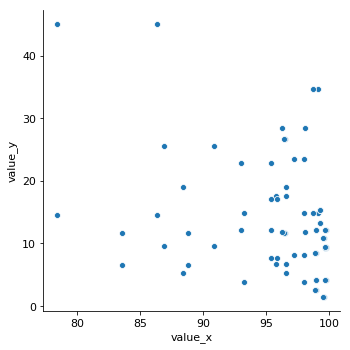

In [75]:
sns.relplot(x='value_x',y='value_y', data=df2)

This scatter plot below is broken down by part-time employement rate and then literacy rate and then by gender as well. The plots show that women hold more part-time jobs and have a lower average literacy rate then their counter parts. 

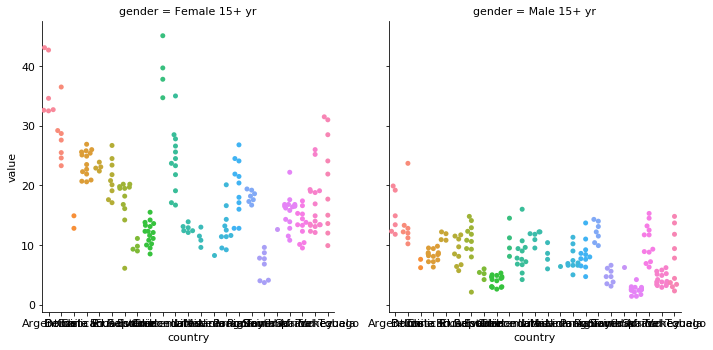

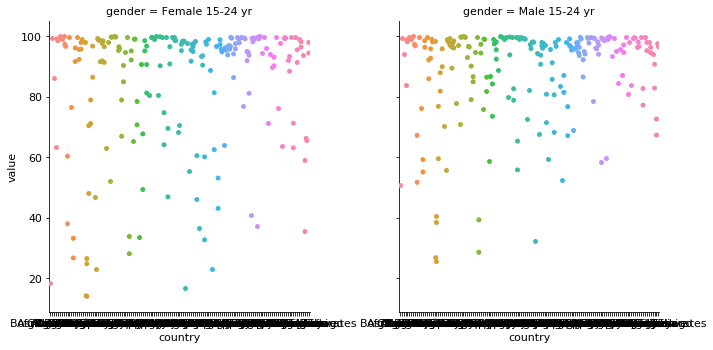

In [71]:
sns.catplot(x='country',y='value',col='gender', kind='swarm', data= employment)
sns.catplot(x='country',y='value',col='gender', kind='swarm', data= literacy)

Hypothesis: I believe that the data will show an inverse effect. The countries with high literacy rates for either gender will show a lower part-time employment rate and those with low literacy rates will show higher part-time employment work. Due to families needing financial support and unable to continue sending their children to school after a certain age. 

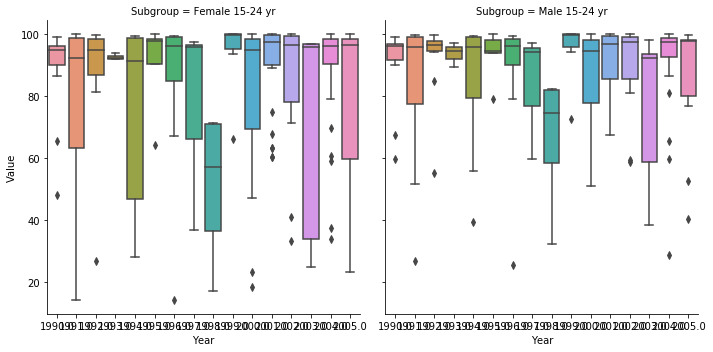

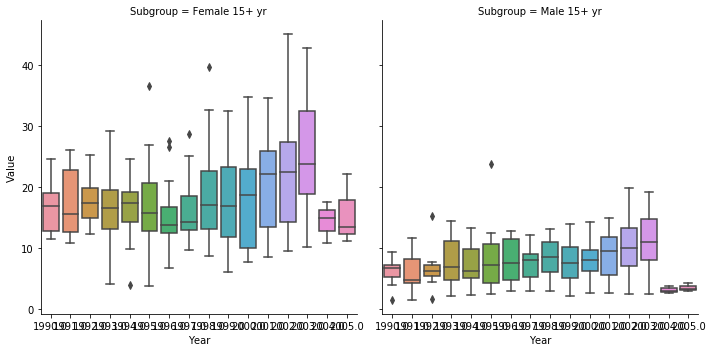

In [22]:
sns.catplot(x="Year", y= "Value", col= "Subgroup",kind="box", data= literacy)
sns.catplot(x="Year", y= "Value", col= "Subgroup",kind="box", data= employment)

To further research this topic I would look into a few different factors I believe could make a difference in literacy and employment: 
1. Household size- number of children
2. Household income
3. Break it down by city vs rural and see it that effects the rates
4. Education level of the parents
5. Religion
By researching these factors more deeply it would allow us to make a stronger statement on the difference in literacy vs work. Using different means of collection would help provide information, however a census I think woud be the most reliable form of information. 

To keep information accurate across the genders and years I would make sure that the count for all recieved data is the same as too avoid skewed data. Complete gathering the data at the completion of each calendar year to keep the data even year after year. 